# Forest Fire Detection : Using CNN.....

### Project Description
There is a dataset of forest images, part of which is fire. The task is to develop a machine learning convolutional neural network algorithm to detect whether the image is **Fire** or **No-Fire** on the unknown dataset.

### Data Description
The dataset consists of images, and some of them are Fire or No-Fire

Data files:
- ```train and validation ``` - a folder for training
- ```test``` - a folder with images, for which we make Detection.

### Project Methodology

 - We Used CNN in this

#### Final project output: ***Image with label 1) Fire or 2) No-Fire***

### Data
Dataset can be found [here](https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data).


## Import Important Librarie's

In [50]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from PIL import Image
import cv2
import joblib
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [14]:
# resize all image as a part of data pre-processing.
train = ImageDataGenerator(rescale=1/255, 
                           rotation_range=20, 
                           width_shift_range=0.1, 
                           height_shift_range=0.1, 
                           shear_range=0.1,
                           zoom_range=0.1, 
                           horizontal_flip=True, 
                           fill_mode='nearest'
                          )  
test = ImageDataGenerator(rescale=1/255, 
                          rotation_range=20, 
                          width_shift_range=0.1, 
                          height_shift_range=0.1, 
                          shear_range=0.1,
                          zoom_range=0.1, 
                          horizontal_flip=True, 
                          fill_mode='nearest'
                         )

In [15]:
#flow_from_directory generally "Takes the path to a directory, and generates batches of augmented/normalized data"
train_dataset = train.flow_from_directory(
    "./forest_fire/Training and Validation",
    target_size=(150,150), 
    batch_size = 32, 
    class_mode = 'binary'
)

Found 1832 images belonging to 2 classes.


In [16]:
test_dataset = test.flow_from_directory(
    "./forest_fire/Testing",
    target_size=(150,150), 
    batch_size =32, 
    class_mode = 'binary'
)

Found 68 images belonging to 2 classes.


In [17]:
print(test_dataset.class_indices)
print(train_dataset.class_indices)

{'fire': 0, 'nofire': 1}
{'fire': 0, 'nofire': 1}


In [19]:
img = Image.open('./forest_fire/Training and Validation/fire/abc001.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x21C6855F650>


### **Convolution filters** : These are filters (multi-dimensional data) used in Convolution layer which helps in extracting specific features from input data.
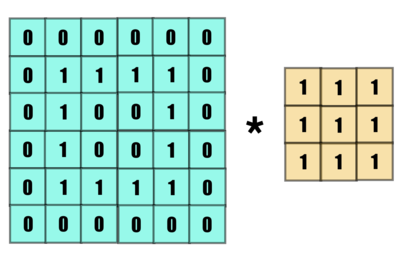
### A **kernel** is, as described earlier, a matrix of weights which are multiplied with the input to extract relevant features.

### Activation : It’s just a thing function that you use to get the output of node. It is also known as Transfer Function. It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

## Creating and training different CNNs

In the CNN structure we add **Dropout() regularization and BatchNormalization()** layers.

### Batch normalization : it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network.

- **BatchNormalization()** normalizes the activations of the previous layer at each batch, by subtracting the batch mean and dividing by the batch standard deviation. This helps to **stabilize the learning process and allow higher learning rates**, as well as reducing the chances of the model getting stuck in the saddle points or local optima.

- **Dropout()** is a regularization technique where some neurons are randomly dropped out during training. This helps to **reduce overfitting by preventing complex co-adaptations on training data**. The dropout rate is the fraction of neurons that are dropped out, usually between 0.2 and 0.5. At test time, no neurons are dropped out, but the weights are scaled by the dropout rate to balance the effect of missing neurons.

### Dropout can be used after any non-output layer. To investigate the impact of dropout, train an image classification model. I'll start with an unregularized network and then use Dropout to train a regularised network.

In [24]:
def Build_CNN_model(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(filters = 32, kernel_size=(2, 2), activation ='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.BatchNormalization()) # added
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # Normalize activation of previous layer at each batch so that cnn stabilize the learning process and allow 
   # higher rate.
    model.add(keras.layers.BatchNormalization()) # added
    
   # convert matrix into single vector
    model.add(keras.layers.Flatten())
    
   # here me were classify
    model.add(keras.layers.Dense(64, activation='relu'))
   # Normalize activation of previous layer at each batch so that cnn stabilize the learning process and allow 
   # higher rate.
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.0001) # updated to lr=0.0001

    model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [25]:
input_shape = (150,150,3)

In [26]:
model1 = Build_CNN_model(input_shape)
CNN_Model_1 = model1.fit(train_dataset, epochs = 50, validation_data = test_dataset)

Epoch 1/50
58/58 [==============================] - 78s 1s/step - loss: 0.1997 - accuracy: 0.9269 - val_loss: 0.8656 - val_accuracy: 0.3235
Epoch 2/50
58/58 [==============================] - 33s 546ms/step - loss: 0.1364 - accuracy: 0.9531 - val_loss: 0.7582 - val_accuracy: 0.3235
Epoch 3/50
58/58 [==============================] - 43s 738ms/step - loss: 0.1262 - accuracy: 0.9569 - val_loss: 1.0529 - val_accuracy: 0.3235
Epoch 4/50
58/58 [==============================] - 45s 781ms/step - loss: 0.1171 - accuracy: 0.9525 - val_loss: 0.6861 - val_accuracy: 0.4853
Epoch 5/50
58/58 [==============================] - 45s 767ms/step - loss: 0.1067 - accuracy: 0.9623 - val_loss: 0.9394 - val_accuracy: 0.3676
Epoch 6/50
58/58 [==============================] - 40s 678ms/step - loss: 0.0931 - accuracy: 0.9672 - val_loss: 0.9509 - val_accuracy: 0.4265
Epoch 7/50
58/58 [==============================] - 38s 658ms/step - loss: 0.1006 - accuracy: 0.9580 - val_loss: 0.3159 - val_accuracy: 0.8971
Ep

In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                      

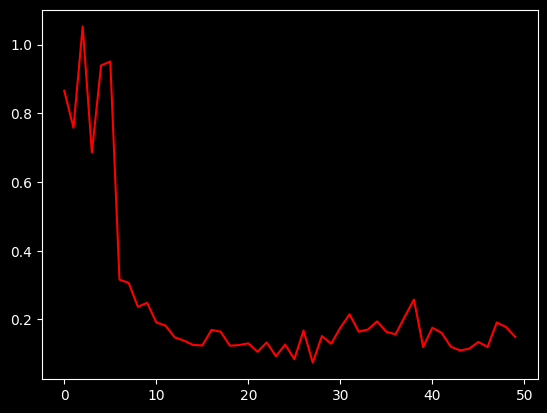

In [41]:
plt.style.use('dark_background')
plt.plot(CNN_Model_1.history['val_loss'], 'r');

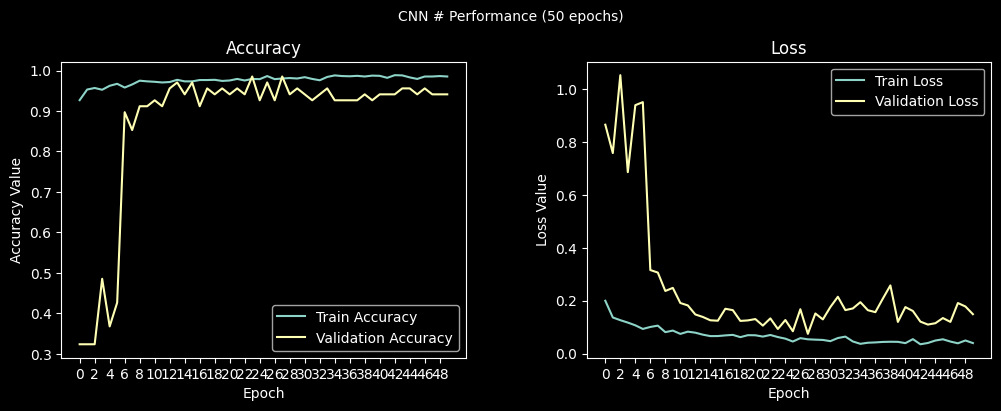

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN # Performance (50 epochs)', fontsize=10)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0, 50))
ax1.plot(epoch_list, CNN_Model_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, CNN_Model_1.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, 50, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, CNN_Model_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, CNN_Model_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [44]:
# Evaluate the loss and accuracy
loss, accuracy = model1.evaluate(test_dataset)

# Print the accuracy
print("Model 1 Accuracy: " + str(accuracy))
# Print the loss
print("Model 1 Loss: " + str(loss))


3/3 [==============================] - 1s 166ms/step - loss: 0.1248 - accuracy: 0.9265
Model 1 Accuracy: 0.9264705777168274
Model 1 Loss: 0.12477550655603409


In [45]:
prediction1 = model1.predict(test_dataset)
print('Length :', len(prediction1))

3/3 [==============================] - 1s 192ms/step
Length : 68


In [51]:
joblib.dump(model1, 'model.pkl')

['model.pkl']

# Conclusion :
### We Successfully build different CNN model with high accuracy of 95 % and saved model1.h5 and model2.h5 Now we go to our load_prediction Part 